
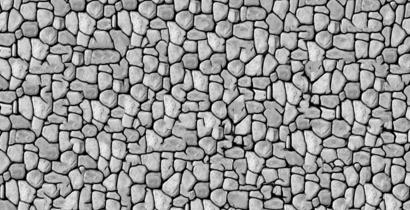

# Texture Quilting

In this project, I use code to stitch together image patches sampled from an input texture in order to synthesize new texture images.

---

---
# Part 1 - Shortest Path 


The function ***shortest_path***  takes an 2D array of ***costs***, of shape HxW, as input and finds the *shortest vertical path* from top to bottom through the array. A vertical path is specified by a single horizontal location for each row of the H rows. Locations in successive rows should not differ by more than 1 so that at each step the path either goes straight or moves at most one pixel to the left or right. The cost is the sum of the costs of each entry the path traverses. Your function should return an length H vector that contains the index of the path location (values in the range 0..W-1) for each of the H rows.

I solved the problem by implementing a dynamic programming algorithm. I used a for-loop over the rows of the "cost-to-go" array, computing the cost of the shortest path up to that row using the recursive formula that depends on the costs-to-go for the previous row. Once at the last row, we can then find the smallest total cost. To find the path which actually has this smallest cost, we will need to do  backtracking. The easiest way to do this is to also store the index of whichever minimum was selected at each location. These indices will also be an HxW array. We can then backtrack through these indices, reading out the path.

In [2]:
#modules used
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def shortest_path(costs):
    """
    This function takes an array of costs and finds a shortest path from the 
    top to the bottom of the array which minimizes the total costs along the
    path. The path should not shift more than 1 location left or right between
    successive rows.
    
    In other words, the returned path is one that minimizes the total cost:
        
        total_cost = costs[0,path[0]] + costs[1,path[1]] + costs[2,path[2]] + ...

    subject to the constraint that:
    
        abs(path[i]-path[i+1])<=1
    
    Parameters
    ----------
    costs : 2D float array of shape HxW
         An array of cost values with W>=3
    
    Returns
    -------
    path : 1D array of length H
        indices of a vertical path.  path[i] contains the column index of 
        the path for each row i. 
    """

    nrows = costs.shape[0]
    ncols = costs.shape[1]
    
    # to keep the implementation simple, we will refuse to handle
    # the boundary case where the cost array is very narrow.
    assert(ncols>=3)
    
    M = np.copy(costs)
    Q = np.zeros_like(M, dtype=int)
    Q[0,:] = np.arange(ncols)
    
    for i in range(1, nrows):
        for j in range(0, ncols):
            # left side case where there is no j-1
            if j == 0:
                Q[i,j] = np.argmin(M[i-1, j:j+2])
                min_cost = M[i-1, Q[i,j]]
            # right side case where there is no j+1
            elif j == ncols-1:
                Q[i,j] = np.argmin(M[i-1, j-1:j+1]) + j-1
                min_cost = M[i-1, Q[i,j]]
            # normal case
            else:
                Q[i,j] = np.argmin(M[i-1, j-1:j+2]) + j-1
                min_cost = M[i - 1, Q[i,j]]

            M[i,j] += min_cost
    
    cur = np.argmin(M[nrows-1,:])
    path = np.empty((nrows),dtype=int)
    path[-1] = cur
    for k in range(nrows-2,-1,-1):
        path[k] = Q[k+1,cur]
        cur = path[k]
 
    
    return path

In [64]:
#
#  test code


# normal case
costs1 = np.array([[9,9,8,9,9],
                   [9,7,8,8,9],
                   [6,9,7,9,9],
                   [6,7,9,9,9],
                   [9,5,9,9,9],
                   [9,3,4,9,9],
                   [9,9,1,9,9]])
path1 = shortest_path(costs1)

print(costs1)
print("path1:",path1)

# special case where a simple greedy forward seach fails
costs2 = np.array([[9,1,9,9,9,8,9],
                   [9,7,9,9,9,8,9],
                   [9,7,9,9,9,9,8],
                   [9,8,9,9,9,1,9],
                   [6,9,9,9,1,9,9],
                   [9,8,9,9,9,1,9],
                   [9,8,9,9,9,9,1],
                   [9,9,7,9,9,1,9]])
path2 = shortest_path(costs2)

print(costs2)
print("path2:",path2)

# case where the seam is a stright line flushed to the right side
costs3 = np.array([[9,9,9,8,9,9,1],
                   [9,7,9,9,9,9,1],
                   [9,7,9,3,9,9,1],
                   [9,8,9,9,9,9,1],
                   [6,9,9,9,5,9,1],
                   [9,8,9,6,9,9,1],
                   [9,8,9,9,9,9,1],
                   [9,9,7,9,9,9,1]])
path3 = shortest_path(costs3)

print(costs3)
print("path3:",path3)

# case where the seam is a stright line flushed to the left side
costs4 = np.array([[1,9,9,8,9,9,9],
                   [1,7,9,9,9,9,9],
                   [1,7,9,3,9,9,9],
                   [1,8,9,9,9,9,9],
                   [1,9,9,9,5,9,9],
                   [1,8,9,6,9,9,9],
                   [1,8,9,9,9,9,9],
                   [1,9,7,9,9,9,9]])
path4 = shortest_path(costs4)

print(costs4)
print("path4:",path4)

[[9 9 8 9 9]
 [9 7 8 8 9]
 [6 9 7 9 9]
 [6 7 9 9 9]
 [9 5 9 9 9]
 [9 3 4 9 9]
 [9 9 1 9 9]]
path1: [2 1 0 0 1 1 2]
[[9 1 9 9 9 8 9]
 [9 7 9 9 9 8 9]
 [9 7 9 9 9 9 8]
 [9 8 9 9 9 1 9]
 [6 9 9 9 1 9 9]
 [9 8 9 9 9 1 9]
 [9 8 9 9 9 9 1]
 [9 9 7 9 9 1 9]]
path2: [5 5 6 5 4 5 6 5]
[[9 9 9 8 9 9 1]
 [9 7 9 9 9 9 1]
 [9 7 9 3 9 9 1]
 [9 8 9 9 9 9 1]
 [6 9 9 9 5 9 1]
 [9 8 9 6 9 9 1]
 [9 8 9 9 9 9 1]
 [9 9 7 9 9 9 1]]
path3: [6 6 6 6 6 6 6 6]
[[1 9 9 8 9 9 9]
 [1 7 9 9 9 9 9]
 [1 7 9 3 9 9 9]
 [1 8 9 9 9 9 9]
 [1 9 9 9 5 9 9]
 [1 8 9 6 9 9 9]
 [1 8 9 9 9 9 9]
 [1 9 7 9 9 9 9]]
path4: [0 0 0 0 0 0 0 0]


# Part 2 - Image Stitching


The function ***stitch*** takes two gray-scale images, ***left_image*** and ***right_image*** and a specified ***overlap*** and returns a new output image by stitching them together along a vertical seam where the two images have very similar brightness values. If the input images are of widths ***w1*** and ***w2*** then the stitched result image returned by the function should be of width ***w1+w2-overlap*** and have the same height as the two input images.

We will want to first extract the overlapping strips from the two input images and then compute a cost array given by the absolute value of their difference. I can then use my ***shortest_path*** function to find the seam along which to stitch the images where they differ the least in brightness. Finally we need to generate the output image by using pixels from the left image on the left side of the seam and from the right image on the right side of the seam. 

In [4]:
def stitch(left_image, right_image, overlap):
    """
    This function takes a pair of images with a specified overlap and stitches them
    togther by finding a minimal cost seam in the overlap region.
    
    Parameters
    ----------
    left_image : 2D float array of shape HxW1
        Left image to stitch 
    
    right_image : 2D float array of shape HxW2
        Right image to stitch 

    overlap : int
        Width of the overlap zone between left and right image
        
    Returns
    -------
    stitched : 2D float array of shape Hx(W1+W2-overlap)
        The resulting stitched image
    """
    
    # inputs should be the same height
    assert(left_image.shape[0]==right_image.shape[0])
    assert(overlap>=3)
    
    lio = left_image[:,left_image.shape[1]-overlap:]
    rio = right_image[:,right_image.shape[1]-overlap:]
    box = np.absolute(lio-rio)
    path = shortest_path(box)
    
#     stitched = np.zeros((left_image.shape[0],left_image.shape[1]+right_image.shape[1]-overlap))
#     for i in range(len(path)):
#         stitched[i] = np.concatenate((left_image[i,:left_image.shape[1]-overlap+path[i]],right_image[i,path[i]:]))

    li_col = left_image.shape[1]
    lic = np.concatenate((left_image,np.zeros((left_image.shape[0],right_image.shape[1]-overlap), dtype=int)), axis=1)
    ric = np.concatenate((np.zeros((right_image.shape[0],li_col-overlap), dtype=int), right_image), axis=1)

    lic[np.arange(lic.shape[1]) > (path[:, None]+li_col-overlap)] = 0
    ric[np.arange(ric.shape[1]) <= (path[:, None]+li_col-overlap)] = 0
    
    stitched = lic+ric
    
    assert(stitched.shape[0]==left_image.shape[0])
    assert(stitched.shape[1]==(left_image.shape[1]+right_image.shape[1]-overlap))
    
    return stitched
    
    

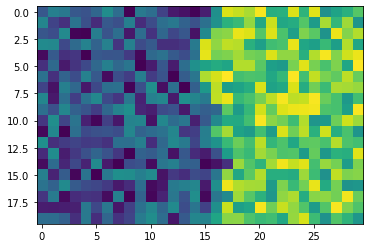

In [11]:
# a simple test visualization of stitching two random
# tiles which have different overall brightness so we
# can easily see where the seam is

L = np.random.rand(20,20)+1
R = np.random.rand(20,20)+2
S = stitch(L,R,10)
plt.imshow(S)
plt.show()


# Part 3 - Texture Quilting

The function ***synth_quilt***  takes as input an array indicating the set of texture tiles to use, an array containing the set of available texture tiles, the ***tilesize*** and ***overlap*** parameters and synthesizes the output texture by stitching together the tiles. ***synth_quilt***  utilizes my stitch function repeatedly. First, for each horizontal row of tiles, construct the stitched row by successively stitching the next tile in the row on to the right side of your row image. Once we have row images for all the rows, we can stitch them together to get the final image. Since my stitch function only works for vertical seams, I have to transpose the rows, stitch them together, and then transpose the result.

In [210]:
def synth_quilt(tile_map,tiledb,tilesize,overlap):
  
    """
    This function takes as input an array indicating the set of texture tiles 
    to use at each location, an array containing the database of available texture 
    tiles, tilesize and overlap parameters, and synthesizes the output texture by 
    stitching together the tiles

    
    Parameters
    ----------
    tile_map : 2D array of int
        Array storing the indices of which tiles to paste down at each output location 
    
    tiledb : 2D array of int 
        Collection of sample tiles to select from. The array is of size ntiles x npixels 
        where each tile image is stored in vectorized form as a row of the array.
        
    tilesize : (int,int)
        Size of a tile in pixels
        
    overlap : int
        Amount of overlap between tiles
        
    Returns
    -------
    output : 2D float array
        The resulting synthesized texture of size
    """
    
    # determine output size based on overlap and tile size
    outh = (tilesize[0]-overlap)*tile_map.shape[0] + overlap
    outw = (tilesize[1]-overlap)*tile_map.shape[1] + overlap
    output = np.zeros((outh,outw))
    
    rows = np.zeros((tilesize[0]*tile_map.shape[0],outw))

    
    for i in range(tile_map.shape[0]):
        row_length = 0
        for j in range(tile_map.shape[1]):
            icoord = i*tilesize[0]
            jcoord = j*(tilesize[1]-overlap)
            tile_vec = tiledb[tile_map[i,j],:];
            tile_image = np.reshape(tile_vec,tilesize)
            
            if j == 0:
                rows[icoord:(icoord+tilesize[0]),jcoord:(jcoord+tilesize[1])] = tile_image
                row_length += tilesize[1] 
            else:
                rows[icoord:(icoord+tilesize[0]),:row_length+tilesize[1]-overlap] =\
                    stitch(rows[icoord:(icoord+tilesize[0]),:row_length],tile_image,overlap)
                row_length += (tilesize[1]-overlap)
    
    output = output.T
    rows = rows.T
    row_length = 0
    for i in range(tile_map.shape[0]):
        icoord = i*(tilesize[0]-overlap)
        if i == 0:
            output[:,:tilesize[0]] = rows[:,:tilesize[0]]
            row_length += tilesize[0] 
        else:
            output[:,:row_length+tilesize[0]-overlap] =\
                stitch(output[:,:row_length],rows[:,i*tilesize[0]:i*tilesize[0]+tilesize[0]],overlap)
            row_length += (tilesize[0]-overlap)
    
    return output.T


# Part 4 - Texture Synthesis Demo

The function below ***quilt_demo*** puts together the pieces. It takes a sample texture image and a specified output size and uses the functions implemented previously to synthesize a new texture sample.

In [208]:
#skimage is only needed for sample tiles code provided below
import skimage as ski 

def sample_tiles(image,tilesize,randomize=True):
    """
    This function generates a library of tiles of a specified size from a given source image
       
    Parameters
    ----------
    image : float array of shape HxW
        Input image 
            
    tilesize : (int,int)
        Dimensions of the tiles in pixels
        
        
    Returns
    -------
    tiles : float array of shape  numtiles x numpixels
        The library of tiles stored as vectors where npixels is the 
        product of the tile height and width     
    """
    
    tiles = ski.util.view_as_windows(image,tilesize)
    ntiles = tiles.shape[0]*tiles.shape[1]
    npix = tiles.shape[2]*tiles.shape[3]
    assert(npix==tilesize[0]*tilesize[1])
    
#     print("library has ntiles = ",ntiles,"each with npix = ",npix)
    
    tiles = tiles.reshape((ntiles,npix)) 
    
    # randomize tile order
    if randomize:
        tiles = tiles[np.random.permutation(ntiles),:]
    
    return tiles


def topkmatch(tilestrip,dbstrips,k):
    """
    This function finds the top k candidate matches in dbstrips that
    are most similar to the provided tile strip.
      
    Parameters
    ----------
    tilestrip : 1D float array of length npixels
        Grayscale values of the query strip 
    
    dbstrips : 2D float array of size npixels x numtiles
        Array containing brightness values of numtiles strips in the database 
        to match to the npixels brightness values in tilestrip
                
    k : int
        Number of top candidate matches to sample from
        
    Returns
    -------
    matches : list of ints of length k
        The indices of the k top matching tiles   
    """
    assert(k>0)
    assert(dbstrips.shape[0]>k)
    error = (dbstrips-tilestrip)
    ssd = np.sum(error*error,axis=1)
    ind = np.argsort(ssd)
    matches = ind[0:k]
    return matches


def quilt_demo(sample_image, ntilesout=(10,20), tilesize=(30,30), overlap=5, k=5):
    """
    This function takes an image and quilting parameters and synthesizes a
    new texture image by stitching together sampled tiles from the source image.

     
    Parameters
    ----------
    sample_image : 2D float array
        Grayscale image containing sample texture 
    
    ntilesout : list of int
        Dimensions of output in tiles,  e.g. (3,4)
        
    tilesize : int
        Size of the square tile in pixels
        
    overlap : int
        Amount of overlap between tiles
        
    k : int
        Number of top candidate matches to sample from
        
    Returns
    -------
    img : list of int of length K
        The resulting synthesized texture of size           
    """
    
    # generate database of tiles from sample
    tiledb = sample_tiles(sample_image,tilesize)
    # number of tiles in the database
    nsampletiles = tiledb.shape[0]
    
    if (nsampletiles<k):
        print("Error: tile database is not big enough!")

    # generate indices of the different tile strips so we can easily
    # extract the left, right, top or bottom overlap strip from a tile
    i,j = np.mgrid[0:tilesize[0],0:tilesize[1]]
    top_ind = np.ravel_multi_index(np.where(i<overlap),tilesize)
    bottom_ind = np.ravel_multi_index(np.where(i>=tilesize[0]-overlap),tilesize)
    left_ind = np.ravel_multi_index(np.where(j<overlap),tilesize)
    right_ind = np.ravel_multi_index(np.where(j>=tilesize[1]-overlap),tilesize)

    # initialize an array to store which tile will be placed
    # in each location in the output image
    tile_map = np.zeros(ntilesout,'int')
    
#     print('row:')
    for i in range(ntilesout[0]):
#         print(i)
        for j in range(ntilesout[1]):
            
            if (i==0)&(j==0):                  # first row first tile
                matches = np.zeros(k) #range(nsampletiles)
            
            elif (i==0):                       # first row (but not first tile)
                left_tile = tile_map[i,j-1]
                tilestrip = tiledb[left_tile,right_ind]
                dbstrips = tiledb[:,left_ind]
                matches = topkmatch(tilestrip,dbstrips,k)
                
            elif (j==0):                       # first column (but not first row)
                above_tile = tile_map[i-1,j]
                tilestrip = tiledb[above_tile,bottom_ind]
                dbstrips = tiledb[:,top_ind] 
                matches = topkmatch(tilestrip,dbstrips,k)
                
            else:                              # neigbors above and to the left
                left_tile = tile_map[i,j-1]
                tilestrip_1 = tiledb[left_tile,right_ind]
                dbstrips_1 = tiledb[:,left_ind]
                above_tile = tile_map[i-1,j]
                tilestrip_2 = tiledb[above_tile,bottom_ind]
                dbstrips_2 = tiledb[:,top_ind]
                # concatenate the two strips
                tilestrip = np.concatenate((tilestrip_1,tilestrip_2))
                dbstrips = np.concatenate((dbstrips_1,dbstrips_2),axis=1)
                matches = topkmatch(tilestrip,dbstrips,k)
                
            #choose one of the k matches at random
            tile_map[i,j] = matches[np.random.randint(0,k)]
    
    output = synth_quilt(tile_map,tiledb,tilesize,overlap)
    
    return output


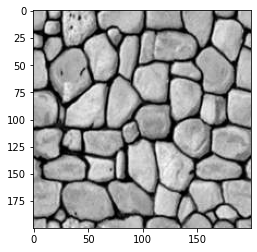

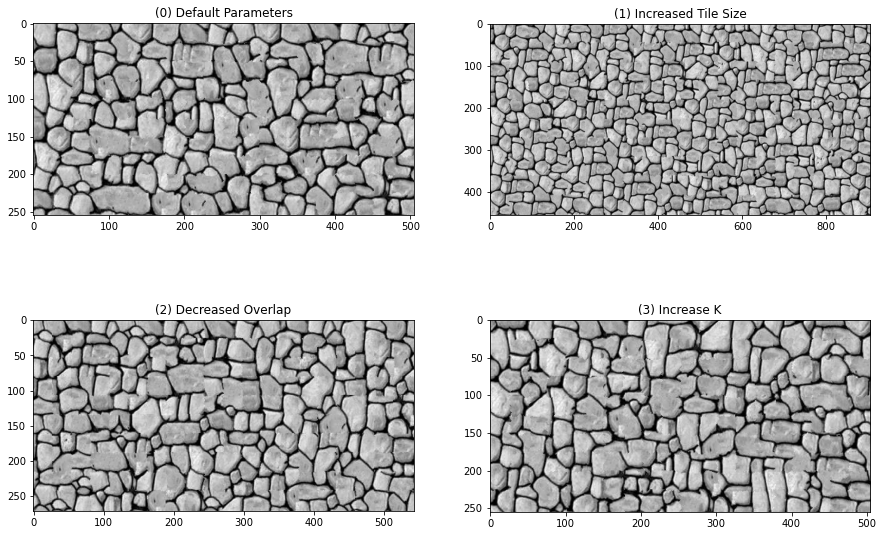

In [218]:
# load in rock_wall.jpg
# run and display results for quilt_demo with 
#
# (0) default parameters
# (1) increased tile size
# (2) decrease the overlap 
# (3) increase the value for K.

I = plt.imread("rock_wall.jpg")

if (I.dtype == np.uint8):
    I = I.astype(float) / 256

if len(I.shape) == 3:
    I[:] = I.mean(axis=-1,keepdims=1)
    I = I[0:I.shape[0],0:I.shape[1],0]

plt.imshow(I,cmap=plt.cm.gray)
plt.show()

fig, ax = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)

texture = quilt_demo(I)
ax[0,0].imshow(texture,cmap=plt.cm.gray)

texture = quilt_demo(I,tilesize=(50,50))
ax[0,1].imshow(texture,cmap=plt.cm.gray)

texture = quilt_demo(I, overlap=3)
ax[1,0].imshow(texture,cmap=plt.cm.gray)

texture = quilt_demo(I,k=15)
ax[1,1].imshow(texture,cmap=plt.cm.gray)

ax[0,0].set_title('(0) Default Parameters')
ax[0,1].set_title('(1) Increased Tile Size')
ax[1,0].set_title('(2) Decreased Overlap')
ax[1,1].set_title('(3) Increase K')
plt.show()


***For each result shown, explain here how it differs visually from the default setting of the parameters and explain why:***

. (1) Increased Tile Size
    Increasing the tile size creates a larger synthesized texture image that fits more of the original sample and has smaller, more complete rocks. When tile size is increased we are able to get more detail from the original texture sample. We can see the detail in the form of more natural looking rocks. In the original image we see a lot of elongated rocks which are easier to notice with the smaller overall image size. In the new image, this effect is less noticeable as the rocks appear smaller overall which gives the illusion of more naturally shaped rocks. 


. (2) Decreased Overlap
    With decreased overlap there is an increase in visible artifacts (i.e. the seams between the tiles became more visible), causing the overall synthesized texture image to appear more blocky. As a result we see a lot of rocks with odd shapes or rocks that seem to collide and merge with each other in unnatural ways. This is because with less overlap, there are fewer pixels to choose from when finding a seam. Also, less overlap means less opportunity for finding matching pixels between neighboring tiles, hence the appearance of more artifacts. Lastly, with less overlap, more of each original tile is used causing the final synthesized texture image to be slightly larger.


. (3) Increased K
    When k was increased, there seemed to be less artifacts (i.e. less little black smudges within the rocks). The individual tiles appear to have blended more seamlessly and there seems to be more variation in the shapes and sizes of the rocks. This is because when k is increased there is a larger set of randomly selected sub-tiles to choose from, which then increases the opportunity of finding better matching candidates when trying to find a tile that has the least sum of squared differences (within the topkmatch function). Having a larger set of random k patches also contributes to more variety in the texture. 

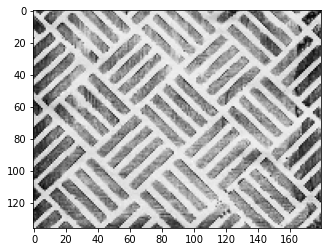

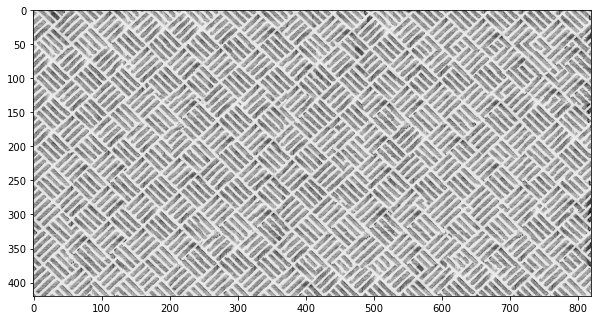

In [264]:
#
# load in yourimage1.jpg
#
# call quilt_demo, experiment with parameters as needed to get a good result
#
# display your source image and the resulting synthesized texture
#
from scipy.ndimage import zoom

I = plt.imread("mytexture1.jpg")

if (I.dtype == np.uint8):
    I = I.astype(float) / 256

if len(I.shape) == 3:
    I[:] = I.mean(axis=-1,keepdims=1)
    I = I[0:I.shape[0],0:I.shape[1],0]

I = zoom(I,0.3)
    
plt.imshow(I,cmap=plt.cm.gray)
plt.show()
texture = quilt_demo(I, tilesize=(60,60), overlap=20)

nfig, ax = plt.subplots(1,1)
nfig.set_figheight(10)
nfig.set_figwidth(10)
ax.imshow(texture,cmap=plt.cm.gray)
plt.show()

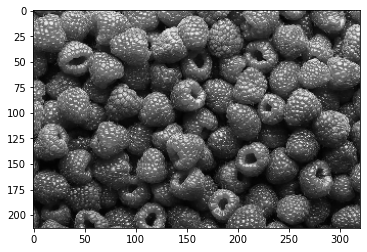

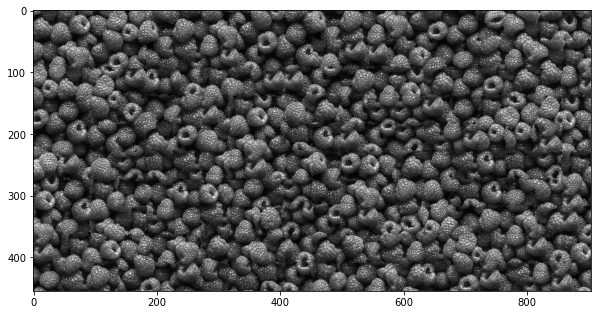

In [265]:
#
# load in yourimage2.jpg
#
# call quilt_demo, experiment with parameters as needed to get a good result
#
# display your source image and the resulting synthesized texture
#
I = plt.imread("mytexture2.jpg")

if (I.dtype == np.uint8):
    I = I.astype(float) / 256

if len(I.shape) == 3:
    I[:] = I.mean(axis=-1,keepdims=1)
    I = I[0:I.shape[0],0:I.shape[1],0]

I = zoom(I,0.4)
    
plt.imshow(I,cmap=plt.cm.gray)
plt.show()
texture = quilt_demo(I, tilesize=(50,50), overlap=5)

nfig, ax = plt.subplots(1,1)
nfig.set_figheight(10)
nfig.set_figwidth(10)
ax.imshow(texture,cmap=plt.cm.gray)
plt.show()